# Tarea 4
Fecha de entrega: _31/Agosto/2017_

Por _Diana López Angeles_

In [1]:
#Le decimos que librerias vamos a usar:
using PyPlot
using SymPy

__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz.
    * Hacer lo mismo usando el método de bisección para $p_k$.
    * Comparar el error de los dos métodos, es decir, el error relativo usando $p_k$ (del método de bisección) y $x_k$ (del método de Newton).

In [2]:
function metodo_newton(init)                     #Definimos nuestra función como David lo hizo en clase
    list=zeros(100);                             #Hacemos una lista con 100 ceros.
    x=init;
    for i in 1:100                               #Ponemos un ciclo para hacer nuestras iteraciones.
        f= x^3-x^2-x-1                           #La función f(x) que nos dice el ejercicio.
        df=3x^2-2x-1                             #La derivada de la función f(x).
        x=x-(f/df);                              #Aquí se hace el método de Newton.
        list[i]=x;                               #Guardamos nuestros datos en la lista.
    end
    return list                                  #Que nos regrese nuestra lista.
end;

In [3]:
#Creamos listas para despues poder gráficar
list1=metodo_newton(100);
list2=metodo_newton(150);
list3=metodo_newton(120);
list4=metodo_newton(130);

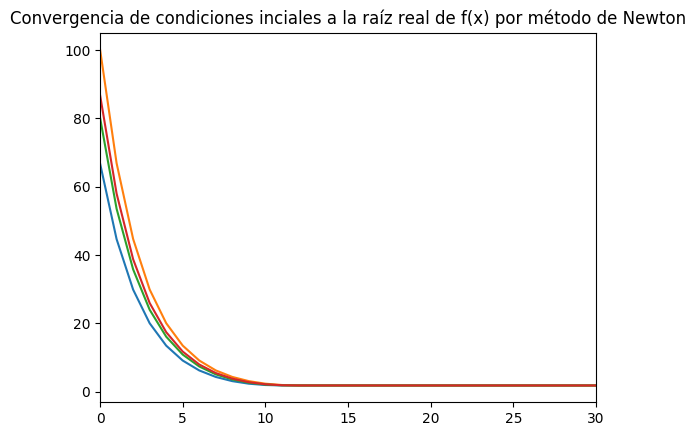

In [4]:
#Le ponemos titulo a la gráfica.
title("Convergencia de condiciones inciales a la raíz real de f(x) por método de Newton")
xlim(0,30)                                       #Ponemos un limite en nuestro eje para que se vea bonita la gráfica.
plot(real(list1))                                #Que nos grafique todas nuestras listas.
plot(real(list2))
plot(real(list3))
plot(real(list4))
show()                                           #Que las muestre.

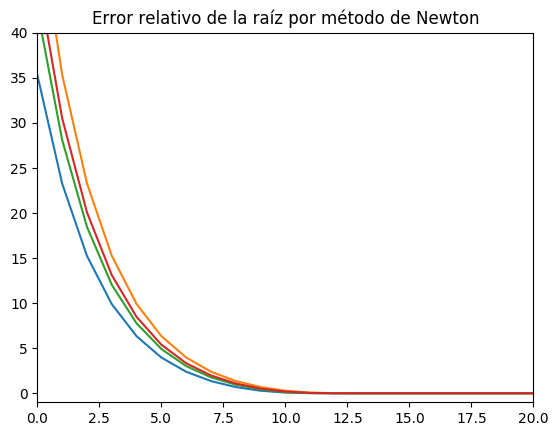

In [5]:
#Ahora queremos gráficar el error relativo de la raíz
title("Error relativo de la raíz por método de Newton")
ylim(-1,40)                                      #Ponemos nuestros limites en el eje x.
xlim(0,20)                                       #Ponemos nuestros limites en el eje y.

#Ahora que grafique el error:
plot(real((list1-list1[100])/list1[100])) 
plot(real((list2-list2[100])/list2[100]))
plot(real((list3-list2[100])/list3[100]))
plot(real((list4-list2[100])/list4[100]))
show()                                           #Que lo muestre
#Lo cual esta muy bien pues el error debe tender a cero.

In [6]:
function metodo_biseccion(a,b)                   #Definimos nuestra función
    list=zeros(100)                              #Hacemos una lista de ceros para que se guarden nuestros datos.
    p = (a+b)/2
    f(x) = x^3-x^2-x-1                           #La funcion a la cual le queremos aproximar raices.
    for i in 1:100                               #Un ciclo for para nuestras iteraciones.
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
        list[i]= p                               #Que los datos se guarden en la lista.
    end
    return list                                  #Que nos regrese nuestra lista.
end;

In [7]:
#Creamos 4 listas con diferentes intervalos [a,b].
lista1= metodo_biseccion(0,100);
lista2= metodo_biseccion(0,200);
lista3= metodo_biseccion(0,300);
lista4= metodo_biseccion(0,400);

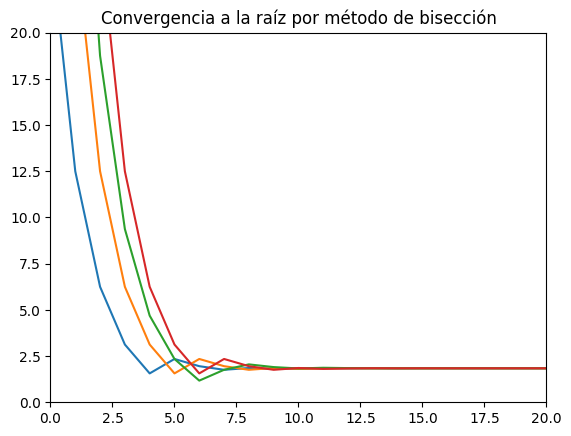

In [8]:
title("Convergencia a la raíz por método de bisección")     #Ponemos titulo a nuestra gráfica.
ylim(0,20)                                                  #Ponemos un limite en el eje y, para que se vea bonito.
xlim(0,20)                                                  #Ponemos un limite en el eje x, para que se vea bonito.
#Que nos grafique todas nuestras listas.
plot(real(lista1))
plot(real(lista2))
plot(real(lista3))
plot(real(lista4))
show()                                                      #Que la muestre.

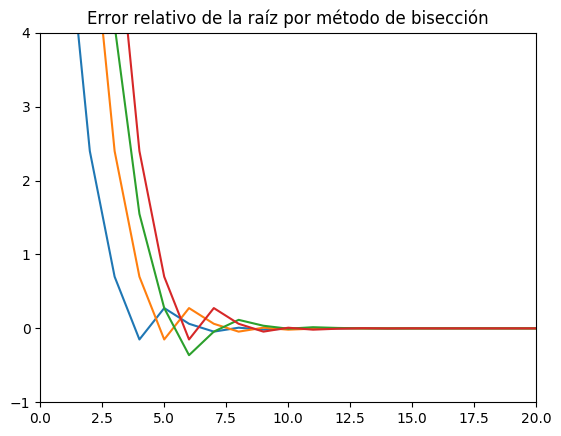

In [9]:
#Ahora queremos gráficar el error relativo de la raíz
title("Error relativo de la raíz por método de bisección")    #Ponemos titulo a nuestra grafica.
ylim(-1,4)                                                    #Ponemos nuestros limites en el eje x.
xlim(0,20)                                                    #Ponemos nuestros limites en el eje y.
#Ahora que grafique el error:
plot(real((lista1-list1[100])/lista1[100])) 
plot(real((lista2-list2[100])/lista2[100]))
plot(real((lista3-list2[100])/lista3[100]))
plot(real((lista4-list2[100])/lista4[100]))
show()                                                        #Que lo muestre
#Lo cual esta muy bien pues el error debe tender a cero.

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser `metodo_newton(f,df,x0)`.

In [10]:
function f(x);           #Aqui vamos a poner la funcion de la cual queramos las raices.
    x^3-x^2-x-1
end;

function df(x);          #Aqui ponemos la derivada de la función.
    3x^2-2x-1
end;

In [11]:
function metodo_newton_arbitrario(f,df,x0)     #Definimos nuestra función como David lo hizo en clase
    x = x0
    for i in 1:100                             #Ponemos un ciclo para hacer nuestras 100 iteraciones.
        x=x-(f(x)/df(x))                       #Aquí se hace el método de Newton.
    end
print("La raíz de f(x)"," con condición inicial x0=", x0," es ", x)
end;

In [12]:
metodo_newton_arbitrario(f,df,45)              #Ejecutamos nuestra función para así obtener nuestra raíz.

La raíz de f(x) con condición inicial x0=45 es 

   * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un intervalo, por ejemplo costruido con `linspace`. Es muy probable que funcione llamando la funcion que crearon como `metodo_newton.(f,df,x)`. Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto.

In [13]:
function metodo_newton_intervalo(f,df,intervalo)    #Definimos nuestra función
    list=zeros(length(intervalo))                   #Una lista de ceros con la longitud de nuestro intervalo.
    x = 0                                           #Ponemos x en cero para que no nos cause problemas al entrar al ciclo for.
    for i in 1:length(intervalo)                    #El ciclo for para que se evalue nuestra función en el intervalo.
        x = intervalo[i]                            #Una lista para que aqui se vayan guardando nuestras raices.
        for n in 1:200                              #Un ciclo for para las iteraciones.
            x = x-(f(x)/df(x))                      #Aqui se hace el método de Newton.
            end                                     #Termina el ciclo.
    list[i]=x;                                      #Que se guarden nuestras raices en la lista previa.
    end
    list                                            #Que nos regrese nuestra lista
end;

In [14]:
metodo_newton_intervalo(f,df,linspace(0,10,3))      #Ejecutamos nuestra función y vemos que funciona.

3-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929

   * Crear la misma rutina, pero que esta vez solo reciba un rango amplio de condiciones iniciales (objetos `linspace`) y que revise el arreglo despues de $200$ iteraciones y solo tome las raices diferentes hasta cierto $\epsilon$. Aquí pueden usar `push!` para ir guardando las raíces en un vector inicializado como (por ej.) `t=[]`. El _output_ tiene que ser precisamente `t`. 

In [15]:
function metodo_newton_epsilon(intervalo)                  #Definimos nuestra función
    t = []                                          #Ponemos un vector vacio donde iremos guardando nuestras raices, como si fuera un "saco".
    epsilon = 10.0^-8                               #Nuestro epsilon, con el orden que David nos dijo.
    list = metodo_newton_intervalo(f,df,intervalo)  #Aqui llamamos la función que habiamos hecho previamente en el inciso anterior
    push!(t,list[1])                                #Vamos a usar un push para iniciar nuestro primer for
    for i in 1:length(t)                            #Para cada elemento en t se va a hacer el for.
        for n in 1:length(list)                     #Aqui estamos agregando un ciclo for para cada elemento en la lista de la función hecha previamente en el inciso anterior, para que podamos hacer las comparaciones.
            if abs(t[i]-list[n]) > epsilon          #Comparamos todos los elementos de la lista con los de t. Si el absoluto de esto entonces tendremos una raíz diferente.
                push!(t,list[n])                    
                end                                 #Con el push se agrega un elemento nuevo a t y se vuelven a repetir los ciclos para así encontrar las raices que son diferentes.
        end
        return t                                    #Que nos regrese nuestro "saco".                       
    end
end

metodo_newton_epsilon (generic function with 1 method)

In [16]:
metodo_newton_epsilon(linspace(0,19,5))                 #A mi parecer es intuitivo que despues de las 200 iteraciones no existan raices diferentes pues en los ciclos pasados con 100 iteraciones ya teniamos convergencia a la raíz de nuestra función.

1-element Array{Any,1}:
 1.83929

* Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sea solamente la función y la condición (o intervalo, es decir, un objeto `linspace`) inicial. Si se complica hacerlo con arreglos `linspace` como condición inicial, basta con hacerlo para flotantes.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        * De preferencia la función que reciba esta rutina debe ser de Julia, sin embargo si lo hicieron solo dentro del marco de SymPy esta bien.

In [17]:
function f(x)                      #Definimos nuestra función f(x)
    x^3-x^2-x-1                    #La funcion a la que le queremos sacar las raices.
end;

In [18]:
function metodo_newton_funcion_y_condicion_inicial(f,condicion_inicial)   #Definimos nuestra función
    x=Sym("x")                                                  #Hacemos x una variable simbolica, para que no tengamos problemas cuando querramos derivar la función.
    df=diff(f(x),x)                                             #Hacemos la derivada respecto a x de la función.
    dfJ=lambdify(df,[x])                                        #con lambdify convertimos a una funcion de julia.
    x = condicion_inicial;                                      #Ponemos a x como nuestra condición inicial.
    for i in 1:200                                              #Que empiece un ciclo con 200 iteraciones.
        x = x-(f(x)/dfJ(x));                                    #Aquí hacemos el método de Newton.
    end
    print("La raíz de la función con la condicion inicial ", condicion_inicial, " es ",x)                                                    #Que nos de nuestra raiz.
end;

In [20]:
metodo_newton_funcion_y_condicion_inicial(f,76)                 #Ejecutamos nuestra función.

La raíz de la función con la condicion inicial 76 es 1.8392867552141612